# DATA LOADING & VISUALIZATION

In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Enable the option to display all rows when we print something
import pandas as pd
pd.set_option('display.max_rows', None)

In [ ]:
# Gorka's drive directory (DON'T REMOVE IT)
%cd drive/MyDrive/UC3M/3.year/2.semester/ML_project

/content/drive/MyDrive/UC3M/3.year/2.semester/ML_project


In [ ]:
# Miguel's drive directory (DON´T REMOVE IT)
#%ls drive/MyDrive/ML_project-20220513T174557Z-001/ML_project

In [ ]:
%cd drive/MyDrive/ML_project-20220513T174557Z-001/ML_project

[Errno 2] No such file or directory: 'drive/MyDrive/ML_project-20220513T174557Z-001/ML_project'
/content/drive/MyDrive/UC3M/3.year/2.semester/ML_project


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Dataset with all the tweets 
data = pd.read_csv('Bitcoin_tweets.csv')
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,5,6,7,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False


## Descriptive statistics of the tweets dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3029118 entries, 0 to 3029117
Data columns (total 13 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   user_name         object
 1   user_location     object
 2   user_description  object
 3   user_created      object
 4   user_followers    object
 5   user_friends      object
 6   user_favourites   object
 7   user_verified     object
 8   date              object
 9   text              object
 10  hashtags          object
 11  source            object
 12  is_retweet        object
dtypes: object(13)
memory usage: 300.4+ MB


All variables are of type object, but we can see that there are three variables 'user_followers', 'user_friends', 'user_favourites' that should be numerical, so we will convert them to numerical type.

In [ ]:
data[['user_followers','user_friends','user_favourites']] = data[['user_followers','user_friends','user_favourites']].apply(pd.to_numeric, errors='coerce')

In [ ]:
data[['user_name','user_location','user_description','user_created','user_verified','date','text','hashtags','source','is_retweet']].describe()

,user_name,user_location,user_description,user_created,user_verified,date,text,hashtags,source,is_retweet
count,3029087,1522353,2652458,3029035,3028994,3028994,3028994,3011951,3025380,3028693
unique,464179,74923,463048,449771,19,2349848,2958306,680477,2271,1
top,Hoba Bot,United States,"Market analysis & recaps, scalping leverage ca...",2012-12-30 21:55:51,False,2021-04-06 01:20:48,💸 Earn free #BTC and multiply crypto up to 15%...,['Bitcoin'],Twitter for Android,False
freq,13137,36086,19674,13141,2227064,83,1351,381111,916751,3028693


In [ ]:
round(data[['user_followers','user_friends','user_favourites']].describe(),2)

,user_followers,user_friends,user_favourites
count,3028993.00,3028979.00,3028980.00
mean,8179.49,1186.71,6590.40
std,103414.58,7014.91,21532.85
min,0.00,0.00,0.00
25%,45.00,54.00,85.00
50%,207.00,233.00,710.00
75%,1238.00,804.00,3850.00
max,24131346.00,4201104.00,1248517.00


(0.0, 100000.0)

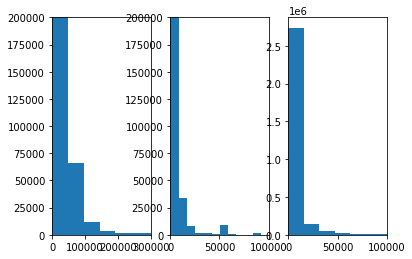

In [ ]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.subplot(1,3,1)
plt.hist(data['user_followers'], bins=500)
plt.xlim(0,300000)
plt.ylim(0,200000)

plt.subplot(1,3,2)
plt.hist(data['user_friends'], bins=500)
plt.xlim(0,100000)
plt.ylim(0,200000)

plt.subplot(1,3,3)
plt.hist(data['user_favourites'], bins=80)
plt.xlim(0,100000)


The variables 'user_followers', 'user_friends' and 'user_favourites' follow highly righ skeweed distribution. We will transform them using logarithmic transformation.

In [ ]:
user_followers = [np.log(sample) if sample != 0 else 1 for sample in data['user_followers']]
user_friends = [np.log(sample) if sample != 0 else 1 for sample in data['user_friends']]
user_favourites = [np.log(sample) if sample != 0 else 1 for sample in data['user_favourites']]

(array([264828., 133998., 301619., 432943., 588498., 612853., 442216.,
        199152.,  51868.,   1005.]),
 array([ 0.       ,  1.4037467,  2.8074934,  4.2112401,  5.6149868,
         7.0187335,  8.4224802,  9.8262269, 11.2299736, 12.6337203,
        14.037467 ]),
 <a list of 10 Patch objects>)

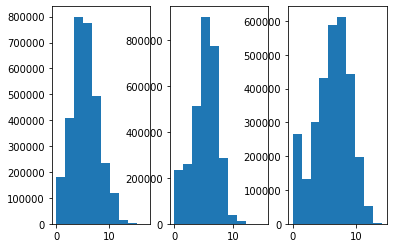

In [ ]:
plt.figure(1)
plt.subplot(1,3,1)
plt.hist(user_followers)

plt.subplot(1,3,2)
plt.hist(user_friends)

plt.subplot(1,3,3)
plt.hist(user_favourites)

After the transformation it can be seen that the variables follow almost a normal distribution.

In [ ]:
data['user_followers'] = user_followers
data['user_friends'] = user_friends
data['user_favourites'] = user_favourites

## Descriptive statistics of bitcoin dataset

In [ ]:
# Dataset with the prices of Bitcoin
price = pd.read_csv('Bitcoin_Historical_Data.csv')
price.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Apr 22, 2022","39,709.0","40,487.0","40,792.0","39,200.0",421.30M,-1.91%
1,"Apr 21, 2022","40,482.0","41,370.0","42,969.0","39,793.0",493.05M,-2.14%
2,"Apr 20, 2022","41,368.0","41,499.0","42,203.0","40,915.0",382.84M,-0.33%
3,"Apr 19, 2022","41,503.0","40,809.0","41,746.0","40,585.0",268.28M,1.72%
4,"Apr 18, 2022","40,803.0","39,700.0","41,095.0","38,577.0",484.26M,2.77%


In [ ]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      442 non-null    object
 1   Price     442 non-null    object
 2   Open      442 non-null    object
 3   High      442 non-null    object
 4   Low       442 non-null    object
 5   Vol.      442 non-null    object
 6   Change %  442 non-null    object
dtypes: object(7)
memory usage: 24.3+ KB


In [ ]:
price['Date'] = pd.to_datetime(price['Date']).dt.date
change = [change.replace('%','') for change in price['Change %']]
listaClose = [value.replace(',','') for value in price['Price']]
listaHigh = [value.replace(',','') for value in price['High']]
listaLow = [value.replace(',','') for value in price['Low']]
listaOpen = [value.replace(',','') for value in price['Open']]
volume = [vol.replace('K','0') for vol in price['Vol.']]
v1 = [vol.replace('M','0000') for vol in volume]
v2 = [vol.replace('B','000000') for vol in v1]
v3 = [value.replace('.','') for value in v2]
price['Open'] = listaOpen
price['High'] = listaHigh
price['Low'] = listaLow
price['Price'] = listaClose
price['Change %'] = change
price['Vol.'] = v3
price.head()


,Date,Price,Open,High,Low,Vol.,Change %
0,2022-04-22,39709.0,40487.0,40792.0,39200.0,421300000,-1.91
1,2022-04-21,40482.0,41370.0,42969.0,39793.0,493050000,-2.14
2,2022-04-20,41368.0,41499.0,42203.0,40915.0,382840000,-0.33
3,2022-04-19,41503.0,40809.0,41746.0,40585.0,268280000,1.72
4,2022-04-18,40803.0,39700.0,41095.0,38577.0,484260000,2.77


We remove the commas of the thousand separation, we also remove the % icon in the change variable and we tranform them in numerical variables.

In [ ]:
price[['Price','Open','High','Low','Vol.','Change %']] = price[['Price','Open','High','Low','Vol.','Change %']].apply(pd.to_numeric)

In [ ]:
round(price[['Price','Open','High','Low','Vol.','Change %']].describe(),2)

,Price,Open,High,Low,Vol.,Change %
count,442.00,442.00,442.00,442.00,4.420000e+02,442.00
mean,46898.45,46893.63,48157.08,45456.39,4.076064e+07,0.09
std,8755.66,8759.31,8867.10,8628.04,1.231889e+08,3.93
min,29793.80,29794.70,31040.80,28901.80,2.600000e+02,-14.40
25%,39952.02,39952.02,41001.55,38645.15,6.025750e+04,-2.12
50%,46401.35,46401.70,47461.95,45034.10,8.337000e+04,0.02
75%,54378.95,54261.20,56374.55,53053.28,1.318575e+05,2.15
max,67527.90,67528.70,68990.60,66334.90,6.495200e+08,19.41


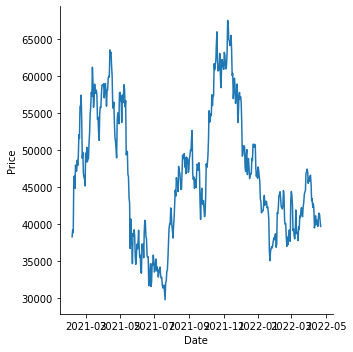

In [ ]:
import seaborn as sns
sns.relplot(
    data=price, kind="line",
    x="Date", y="Price")

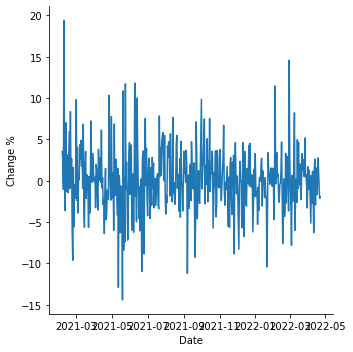

In [ ]:
sns.relplot(
    data=price, kind="line",
    x="Date", y="Change %")

# DATA CLEANING

## Remove useless variables

We remove the variables that we believe that are out of the scope of our work.
- 'is_retweet': All values were False, so we just remove the variable
- 'user_created':
- 'source':

In [ ]:
data.drop(['is_retweet','user_created','source'],axis=1,inplace=True)
data.head()

,user_name,user_location,user_description,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",9.051813,8.936561,8.484257,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin']
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,8.820109,7.334329,10.145767,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']"
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",4.852030,5.805135,6.828712,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,6.437752,4.859812,2.639057,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']"
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,7.130099,7.294377,9.257415,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC']


## NaN Removing & Imputation

We check the number of NaN values in each variable and the ratio qith respect to the number of rows.

In [ ]:
print("The total number of NaN values in each variable is:")
print(data.isna().sum())
print("\n The ratio of NaN values in each variable with respect the entire dataset is:")
print(round(data.isna().sum()/data.shape[0],4))

The total number of NaN values in each variable is:
user_name                31
user_location       1506765
user_description     376660
user_followers          125
user_friends            139
user_favourites         138
user_verified           124
date                    124
text                    124
hashtags              17167
dtype: int64

 The ratio of NaN values in each variable with respect the entire dataset is:
user_name           0.0000
user_location       0.4974
user_description    0.1243
user_followers      0.0000
user_friends        0.0000
user_favourites     0.0000
user_verified       0.0000
date                0.0000
text                0.0000
hashtags            0.0057
dtype: float64


We can get some interesting insights about the dataset:
- It can be seen that almost 50% of the values in the 'user_location' variable are missing. So we decide to remove this variable.
- The variables 'user_followers', 'user_friends', 'user_favourites', 'user_verified', 'date' and 'text' have the same number of missing values (124 in total). We will check if this nan values correspond to the same samples or not.
- There are only 0.5% of missing values in the 'hashtags' variable. We will look to the text of this samples in order to know if they could belong to the bitcoin related tweets or not.       

In [ ]:
print("Number of values with the 't' or the 'T' letter: {}.".format(sum(data.date.str.contains("t")==True)+sum(data.date.str.contains("T")==True)))


Number of values with the 't' or the 'T' letter: 20.


There are some samples that there data was collected incorrectly, so we just try to remove them.

For example, we can see that some of these samples have text in the 'date' variable. These samples could become problematics for our analysis, since the 'date' is a very important variable to take into account. We will keep only variables that do not have any text embedded in the 'date' variable. We have noticed that all the text embedded in the 'date' variable have the 't' letter, so we will just filter it keeping all the values that do not have the 't' letter.

In [ ]:
data.loc[data['date'].str.contains("t") ==True,:]

,user_name,user_location,user_description,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags
64943,Can roam the world，It's nine to five againᵕᴗᵕ)...,2020-11-09 19:44:24,9,3.583519,NaN,NaN,@krakenfx #ETH #BTC If you want to become po...,"['ETH', 'BTC', 'Bitcoin']",Twitter Web App,False
137068,*Muhammad Yasir* hello stalker nice to tweet ...,2009-08-31 07:40:42,280.0,6.212606,NaN,NaN,Official ESHOP Airdrop. If You Missed Meme Tok...,"['cryptocurrency', 'BSC', 'Bitcoin', 'Ethereum...",Twitter for Android,False
180575,• Learn n To Do d'Best...!!!!!!!!,2010-08-16 10:55:09,52.0,4.844187,NaN,NaN,@pufferswap Nice project\n\n@karnoto_hendrik \...,"['YieldFarming', 'Airdrop', 'Binance', 'Bitcoi...",Twitter Web App,False
693194,FB- Xiomara Castañeda,2015-12-21 18:17:12,9.0,6.274762,NaN,NaN,#btc to the moon 🚀🚀 77774,['btc'],Twitter Web App,False
697397,Pin bb : 26ea62f8 . Line : baliratih_bali,2012-06-01 01:08:25,4.0,3.044522,NaN,NaN,#btc to the moon 🚀🚀 46059,['btc'],Twitter Web App,False
1067665,YOU'LL NEVER WALK ALONE,2012-08-29 10:32:29,71.0,7.584773,NaN,NaN,@DogCakeFinance @DogCakeFinance Great project\...,"['YieldFarming', 'Airdrop', 'PancakeSwap', 'Gi...",Twitter for Android,False
1347699,amp=l,2013-01-02 07:40:53,9.0,1.000000,NaN,NaN,@bloodgoodBTC5\n\n#Bitcoin \n\nShort term tr...,['Bitcoin'],Twitter for iPhone,False
1393938,💰 based on the latest AI innovations,2021-03-31 11:02:58,4.0,1.000000,NaN,NaN,🤯Mind-blowing 99.7% of all Bitcoin holders are...,"['cryptotrading', 'crypto', 'tradingbots', 'bi...",Twitter for iPhone,False
1513850,My_Facebook http://t.co/tof8V41sTA,2012-08-24 20:37:55,285.0,5.963579,NaN,NaN,@pythonwealth Good Project 🎉🎉🎉🎉\n\n@nurull_pad...,"['PW', 'pythonwealth', 'Presale', 'token', 'ic...",Twitter Web App,False
1611481,https://t.co/atJqp3g7I2,2014-11-16 20:10:32,2.0,2.995732,NaN,NaN,@iftikharpost the world is flat #bitcoin 💪,['bitcoin'],Twitter for iPhone,False


In [ ]:
data.loc[data['date'].str.contains("T") ==True,:]

,user_name,user_location,user_description,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags
64943,Can roam the world，It's nine to five againᵕᴗᵕ)...,2020-11-09 19:44:24,9,3.583519,NaN,NaN,@krakenfx #ETH #BTC If you want to become po...,"['ETH', 'BTC', 'Bitcoin']",Twitter Web App,False
137068,*Muhammad Yasir* hello stalker nice to tweet ...,2009-08-31 07:40:42,280.0,6.212606,NaN,NaN,Official ESHOP Airdrop. If You Missed Meme Tok...,"['cryptocurrency', 'BSC', 'Bitcoin', 'Ethereum...",Twitter for Android,False
180575,• Learn n To Do d'Best...!!!!!!!!,2010-08-16 10:55:09,52.0,4.844187,NaN,NaN,@pufferswap Nice project\n\n@karnoto_hendrik \...,"['YieldFarming', 'Airdrop', 'Binance', 'Bitcoi...",Twitter Web App,False
1067665,YOU'LL NEVER WALK ALONE,2012-08-29 10:32:29,71.0,7.584773,NaN,NaN,@DogCakeFinance @DogCakeFinance Great project\...,"['YieldFarming', 'Airdrop', 'PancakeSwap', 'Gi...",Twitter for Android,False
1811149,jadii nine is 9 :D,2011-01-20 02:00:55,200.0,3.784190,NaN,NaN,@airdropinspect Good and special project\n@anc...,"['Airdrop', 'Airdrops', 'Airdropinspector', 'B...",Twitter Web App,False
2682674,:3. ...,2010-10-06 05:31:16,252.0,4.574711,NaN,NaN,💸 Earn free #BTC and multiply crypto up to 15%...,"['BTC', 'betfurysuccess']",Twitter Web App,False


In [ ]:
data = data[data.date.str.contains("t") == False] # Keep values that do NOT have the 't' letter
data = data[data.date.str.contains("T") == False] # Keep values that do NOT have the 'T' letter

In [ ]:
data.loc[data['user_followers'].isna()==True,:]

,user_name,user_location,user_description,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags
2612133,Electronics: Find tech deals for smartphones,watches,headphones,NaN,NaN,0.0,35,20,False,2022-03-24 16:52:46


We will remove this sample since its values are not correctly written.

In [ ]:
data = data.loc[data['user_followers'].isna()==False,:] 

In [ ]:
# Remove the 'user_location' variable
data.drop(['user_location'],axis=1,inplace=True)

In [ ]:
sum(data['user_description'].isna())

376577

We do not need the description of each user account, neither the hastaghs that each tweet has.

In [ ]:
data.drop(['user_description'],axis=1,inplace=True)

In [ ]:
data.drop(['hashtags'],axis=1,inplace=True)

In [ ]:
print("We have {} samples.".format(data.shape[0]))

We have 3028979 samples.


We will filter the dataset keeping only the samples that have a high number of followers. Since the 'user_followers' variable is in logaritmic scale, the limit has to be specified in logarithmic scale aswell.

count    3.028979e+06
mean     5.513642e+00
std      2.505582e+00
min      0.000000e+00
25%      3.806662e+00
50%      5.332719e+00
75%      7.121252e+00
max      1.699902e+01
Name: user_followers, dtype: float64
There are 281623 users that have more than 8103.0 followers.


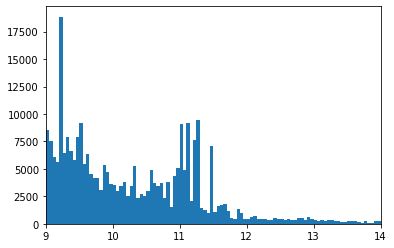

In [ ]:
import matplotlib.pyplot as plt
n_followers = 9
print(data['user_followers'].describe())
print("There are {0} users that have more than {1} followers.".format(sum(data['user_followers']>n_followers),round(np.exp(n_followers),0)))
plt.hist(data['user_followers'], bins=100, range=[n_followers,14])
plt.xlim(xmin=9, xmax=14)
plt.show()

In [ ]:
cond = data['user_followers']>n_followers
dfol = data[cond]
print("The new dataset has {} samples.".format(dfol.shape[0]))
dfol.head()

The new dataset has 281623 samples.


,user_name,user_followers,user_friends,user_favourites,user_verified,date,text
0,DeSota Wilson,9.051813,8.936561,8.484257,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...
9,DeSota Wilson,9.051813,8.936561,8.484257,False,2021-02-10 23:52:08,.@Tesla’s #bitcoin investment is revolutionary...
16,Mr. Anderson,11.191921,6.251904,9.891567,False,2021-02-10 23:48:37,@naval #BTC is unconfiscatable \n\nAll roads l...
18,DeSota Wilson,9.051813,8.936561,8.484257,False,2021-02-10 23:47:13,#Bitcoin institutional demand accelerates in 2...
23,Alex Jiménez,9.579764,6.711740,10.599057,True,2021-02-10 23:45:03,#Bitcoin’s Rally Signals the Rise of Digital A...


We split the 'date' variable into 'date' and 'time'.

In [ ]:
dfol['date'] = pd.to_datetime(dfol['date']).dt.date

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


We are interested to keep the more influential tweets for each day in order to make further analysis. So we keep the 50 tweets for each day that come from users that have most followers. We consider that 50 tweets for each day are enough to the analysis that we want to do, taking into account that we store almost 7000 samples.

In [ ]:
cols = dfol.columns
df = pd.DataFrame(columns=cols)
for date in dfol['date'].unique():
    temp = dfol[dfol['date']==date]
    sorted = temp.sort_values(by='user_followers', ascending=False)
    first = sorted.nlargest(n=50, columns=['user_followers'])
    df = np.vstack((df,first))

In [ ]:
df = pd.DataFrame(df, columns = cols)
df.sort_values(by=["date"], ascending=True, inplace=True)
#df.to_csv('dataCleaned.csv', encoding='utf-8', index=False) # Store the dataframe into a csv file
print(df.shape)
df.head()

(7005, 7)


,user_name,user_followers,user_friends,user_favourites,user_verified,date,text
250,CoinMarketCap,13.503179,7.555905,8.408717,True,2021-02-05,Have you seen our #Bitcoin Analytics Page? \n\...
273,BitcoinAgile,10.91305,9.501516,8.410943,False,2021-02-05,#bitcoin dominance structure for CRYPTOCAP:BTC...
272,BitcoinAgile,10.913068,9.501516,8.410943,False,2021-02-05,Surge in #bitcoin energy consumption sparks de...
271,BitcoinAgile,10.913068,9.501516,8.410943,False,2021-02-05,"Analyst Says #bitcoin Likely Reach $60,000 in ..."
270,Crypto Zombie,10.992874,6.964136,10.059893,False,2021-02-05,#Bitcoin and #altcoins rally into the weekend....


In [ ]:
"""
df = pd.read_csv("dataCleaned.csv") #Load preprocessed dataset
"""

'\ndf = pd.read_csv("dataCleaned.csv") #Load preprocessed dataset\n'

## Subjectivity & polarity

**polarity**: a float within the range [-1.0, 1.0].

**subjectivity**: a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

In [ ]:
text_linkless=[]
for doc in df['text']:
 text_linkless.append([t for t in doc.split() if not (t.startswith('http') or t.startswith('@'))])
text_linkless = [' '.join(text) for text in text_linkless]

In [ ]:
pip install spacytextblob

     |████████████████████████████████| 6.2 MB 4.9 MB/s 
     |████████████████████████████████| 10.1 MB 46.7 MB/s 
     |████████████████████████████████| 457 kB 49.0 MB/s 
     |████████████████████████████████| 181 kB 49.2 MB/s 
     |████████████████████████████████| 653 kB 45.5 MB/s 
     |████████████████████████████████| 42 kB 1.4 MB/s 
     |████████████████████████████████| 58 kB 5.5 MB/s 
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.2.0
    Uninstalling typing-extensions-4.2.0:
      Successfully uninstalled typing-extensions-4.2.0
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: smart-open
    Found existing installation: smart-open 6.0.0
    U

In [ ]:
#lets use the text linkless to try to do a sentiment analysis
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
!python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('spacytextblob')

     |████████████████████████████████| 12.8 MB 5.6 MB/s 
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
# Text normalization function
def normalize_Spacy(text):
  doc = nlp(text)
  normalized_text = [token.lemma_.lower() for token in doc if (not token.is_stop) and (not token.is_punct) and (token.is_alpha or token.is_digit)]
  return normalized_text

In [ ]:
#create nlp objects
nlp_objects = [nlp(text) for text in text_linkless]

In [ ]:
#get polarity and subjectivity attributes
polarity = [doc._.blob.polarity for doc in nlp_objects]
subjectivity = [doc._.blob.subjectivity for doc in nlp_objects]

In [ ]:
df['polarity'] = polarity
df['subjectivity'] = subjectivity

# DATA ANALYSIS



##  Text preprocessing

After computing the subjectivity and polarity, we preprocess the 'text' variable, which contains all the tweet. So using spacy, we tokenize and clean them.

In [49]:
import spacy
nlp = spacy.load("en_core_web_sm")

corpus_prec = []
#to_analyze = []
for tweet in text_linkless:
  text_preproc = normalize_Spacy(tweet)
  corpus_prec.append(text_preproc)
 # to_analyze.append(" ".join(text_preproc))

In [50]:
df['tokenizedCleaned'] = corpus_prec
df.head()

,user_name,user_followers,user_friends,user_favourites,user_verified,date,text,polarity,subjectivity,tokenizedCleaned
250,CoinMarketCap,13.503179,7.555905,8.408717,True,2021-02-05,Have you seen our #Bitcoin Analytics Page? \n\...,0.25,0.5,"[see, bitcoin, analytics, page, learn, bitcoin..."
273,BitcoinAgile,10.91305,9.501516,8.410943,False,2021-02-05,#bitcoin dominance structure for CRYPTOCAP:BTC...,0.00,0.0,"[bitcoin, dominance, structure, cryptocap, jcb..."
272,BitcoinAgile,10.913068,9.501516,8.410943,False,2021-02-05,Surge in #bitcoin energy consumption sparks de...,0.00,0.0,"[surge, bitcoin, energy, consumption, spark, d..."
271,BitcoinAgile,10.913068,9.501516,8.410943,False,2021-02-05,"Analyst Says #bitcoin Likely Reach $60,000 in ...",0.00,1.0,"[analyst, say, bitcoin, likely, reach, 2021, b..."
270,Crypto Zombie,10.992874,6.964136,10.059893,False,2021-02-05,#Bitcoin and #altcoins rally into the weekend....,0.20,0.5,"[bitcoin, altcoin, rally, weekend, eth, cme, f..."


In [51]:
#df.to_csv('dataWithSentiment.csv', encoding='utf-8', index=False) # Store the dataframe into a csv file

In [52]:
# We will just work with a subset of the dataset for simplicity

In [53]:
'''
import pandas as pd
df_sentiment = pd.read_csv("dataWithSentiment.csv")
df_sentiment.head()
'''

'\nimport pandas as pd\ndf_sentiment = pd.read_csv("dataWithSentiment.csv")\ndf_sentiment.head()\n'

# TOPIC MODELLING

We apply LDA in order to compute the topic modeling, this is going to be useful for us in order to see how tweets vary in their content and even all being related to bitcoin how can they differ in their final objective.

### Latent Dirichlet Allocation

In [54]:
#tweetPrice = pd.read_csv("dataTweetsPrice.csv") #Load preprocessed dataset
#tweetPrice.set_index('date')

In [55]:
import gensim


no_below = 10 # Minimum number of documents to keep a term in the dictionary
no_above = .70 # Maximum proportion of documents in which a term can appear to be kept in the dictionary
n_keep = 2000
D = gensim.corpora.Dictionary(corpus_prec)
D.filter_extremes(no_below=no_below,no_above=no_above, keep_n=n_keep)
n_tokens = len(D)
print('The dictionary contains', n_tokens, 'terms')
print('First terms in the dictionary:')
for n in range(20):
    print(str(n), ':', D[n])

The dictionary contains 1334 terms
First terms in the dictionary:
0 : analytic
1 : analytics
2 : chain
3 : datum
4 : learn
5 : page
6 : point
7 : see
8 : btc
9 : cryptocap
10 : dominance
11 : structure
12 : community
13 : crypto
14 : debate
15 : energy
16 : surge
17 : 2021
18 : analyst
19 : likely


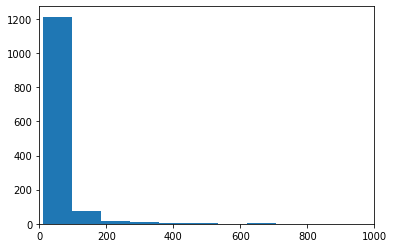

In [56]:
import matplotlib.pyplot as plt
plt.hist(D.dfs.values(),40)
plt.xlim(xmin=0, xmax=1000)
plt.show()

In [57]:
corpus_bow = [D.doc2bow(doc) for doc in corpus_prec]

In [58]:
list_word_counts = [(D[doc_bow[0]], doc_bow[1]) for doc_bow in corpus_bow[4][:10]]
print(list_word_counts)

[('3', 1), ('altcoin', 1), ('day', 1), ('eth', 1), ('ethereum', 1), ('future', 2), ('launch', 1), ('rally', 1), ('ready', 1), ('weekend', 1)]


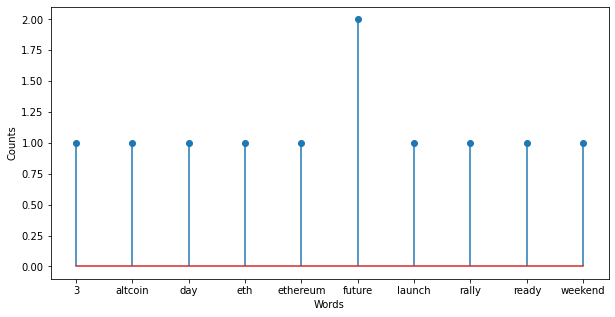

In [59]:
(words, counts) = zip(*list_word_counts)
plt.figure(figsize=(10,5))
plt.stem(words,counts, use_line_collection = True)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.show()

In [60]:
lda_model = gensim.models.LdaMulticore(corpus_bow, num_topics=4, id2word = D, passes=10) # We use BOW instead of TF-IDF!

In [61]:
for idx, topic in lda_model.print_topics(num_words=20):
    print("Topic: %d \nWords: %s" %(idx, topic))
    print("\n")

Topic: 0 
Words: 0.079*"btc" + 0.050*"usd" + 0.048*"transfer" + 0.046*"wallet" + 0.042*"unknown" + 0.025*"coinbase" + 0.020*"crypto" + 0.015*"cryptocurrency" + 0.014*"world" + 0.011*"say" + 0.011*"binance" + 0.010*"asset" + 0.009*"mining" + 0.008*"xapo" + 0.008*"500" + 0.008*"money" + 0.007*"bank" + 0.007*"digital" + 0.007*"affiliatemarkete" + 0.007*"financial"


Topic: 1 
Words: 0.092*"5" + 0.050*"2" + 0.050*"1" + 0.050*"3" + 0.050*"bullish" + 0.046*"trend" + 0.045*"4" + 0.042*"btc" + 0.042*"pair" + 0.035*"result" + 0.030*"buy" + 0.024*"binance" + 0.023*"usdt" + 0.022*"signal" + 0.021*"scan" + 0.020*"m" + 0.018*"15" + 0.018*"kucoin" + 0.010*"gateio" + 0.007*"casino"


Topic: 2 
Words: 0.058*"btc" + 0.041*"crypto" + 0.026*"eth" + 0.024*"nft" + 0.023*"cryptocurrency" + 0.018*"doge" + 0.018*"ethereum" + 0.014*"solana" + 0.014*"altcoin" + 0.013*"nftcommunity" + 0.012*"airdrop" + 0.011*"bnb" + 0.010*"new" + 0.010*"ai" + 0.009*"dogecoin" + 0.009*"cybersecurity" + 0.009*"bigdata" + 0.009*"nf

In [62]:
!pip install wordcloud 

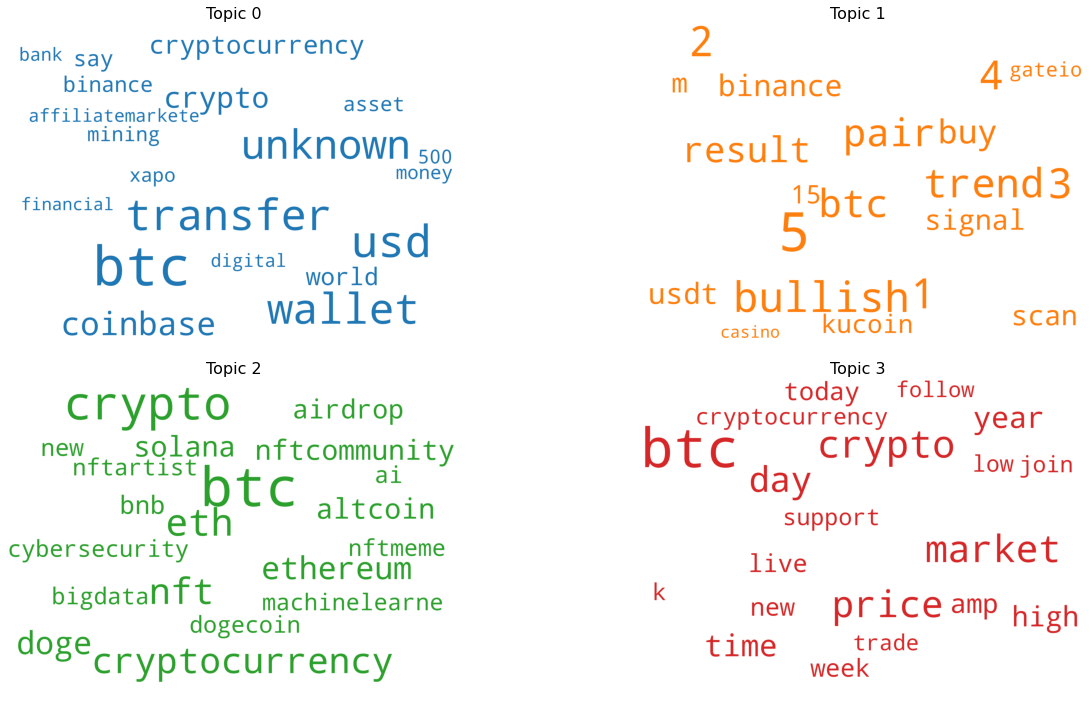

In [63]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False,num_words=20)

fig, axes = plt.subplots(2,2, figsize=(20,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

## Merging both datasets

In [64]:
target = []
for value in price['Change %'].astype(float):
  if value < -2:
    target.append(0)
  elif -2 <= value <= 2:
    target.append(1)
  else:
    target.append(2)
price['target'] = target
price.head()

,Date,Price,Open,High,Low,Vol.,Change %,target
0,2022-04-22,39709.0,40487.0,40792.0,39200.0,421300000,-1.91,1
1,2022-04-21,40482.0,41370.0,42969.0,39793.0,493050000,-2.14,0
2,2022-04-20,41368.0,41499.0,42203.0,40915.0,382840000,-0.33,1
3,2022-04-19,41503.0,40809.0,41746.0,40585.0,268280000,1.72,1
4,2022-04-18,40803.0,39700.0,41095.0,38577.0,484260000,2.77,2


In [65]:
print("Number of change values lower than -2.0: {}".format(sum(price['target']==0)))
print("Number of change values between -2.0 and 2.0: {}".format(sum(price['target']==1)))
print("Number of change values greater than 2.0: {}".format(sum(price['target']==2)))

Number of change values lower than -2.0: 115
Number of change values between -2.0 and 2.0: 212
Number of change values greater than 2.0: 115


In [66]:
#all_df.to_csv('dataTweetsPrice.csv', index=True) # Store the dataframe into a csv file


# FEATURE EXTRACTION

### Linear Discriminant Analysis

1. Doc2Vec of the tweets
2. Train & test splitting
3. Standardize
4. LDA

### DOC2VEC

We will use Doc2Vec algorithm of the SpaCy package to vectorize the tweets. In order to apply the Doc2Vec algorithm, we will use the normalized and tokenized tweets. This normalizing step has been done in a previous step for each tweet individually.

In [67]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Con TaggedDocument, we create a dictionary
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(df['tokenizedCleaned'])]

model = Doc2Vec(documents, vector_size=200,epochs=10)

After applying doc2vec several times, each of them with different vector size, we have seen that 200 could be a proper values in order to collect all the information the tweets have.

### TSNE

In [68]:
from sklearn.manifold import TSNE

embeddings = model.docvecs.vectors_docs
nrows = 1420
tsne = TSNE(n_components=2, random_state=0)
tsne_d2v = tsne.fit_transform(embeddings[:nrows])
tsne_d2v_df = pd.DataFrame(data=tsne_d2v, columns=["x", "y"]) 


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


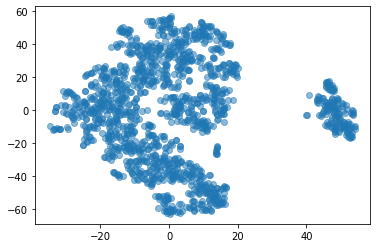

In [69]:
import matplotlib.pyplot as plt
plt.scatter(x='x', y='y', alpha=0.5, data=tsne_d2v_df)
plt.show()

Visualization of the document embeddings

In [70]:
df_embedd = pd.DataFrame(embeddings)
df_embedd.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.004039,-0.007350,-0.006896,0.002612,-0.014417,-0.007926,-0.004273,-0.012766,0.004600,-0.001287,...,0.005539,0.007578,0.002393,0.004622,-0.007431,-0.002527,0.004007,0.002322,-0.004706,-0.004024
1,0.001750,-0.007837,-0.024742,-0.005161,-0.026326,-0.015112,-0.028650,-0.028316,-0.000866,0.009847,...,-0.010208,0.012038,0.004681,0.020432,-0.006152,-0.018906,-0.001331,-0.007706,-0.020165,-0.001251
2,0.004792,-0.008429,-0.022645,0.000063,-0.023701,-0.015832,-0.015011,-0.023378,0.007565,0.003947,...,0.001057,0.014268,0.005041,0.016562,-0.008995,-0.010688,0.002986,0.000666,-0.013983,-0.003007
3,0.004361,0.000668,0.005448,-0.002794,0.006817,0.001211,0.005133,0.003784,-0.002160,0.003036,...,-0.000731,-0.009370,-0.005290,-0.003110,0.006358,-0.002022,-0.008903,-0.002065,0.006454,0.006305
4,0.007056,-0.002348,0.013742,0.006296,-0.002144,0.001972,0.032976,0.021690,0.013506,-0.024277,...,0.043402,0.004398,0.006393,-0.029295,0.003010,0.029127,-0.000815,0.031463,0.016316,-0.015859


In [71]:
df.head()

,user_name,user_followers,user_friends,user_favourites,user_verified,date,text,polarity,subjectivity,tokenizedCleaned
250,CoinMarketCap,13.503179,7.555905,8.408717,True,2021-02-05,Have you seen our #Bitcoin Analytics Page? \n\...,0.25,0.5,"[see, bitcoin, analytics, page, learn, bitcoin..."
273,BitcoinAgile,10.91305,9.501516,8.410943,False,2021-02-05,#bitcoin dominance structure for CRYPTOCAP:BTC...,0.00,0.0,"[bitcoin, dominance, structure, cryptocap, jcb..."
272,BitcoinAgile,10.913068,9.501516,8.410943,False,2021-02-05,Surge in #bitcoin energy consumption sparks de...,0.00,0.0,"[surge, bitcoin, energy, consumption, spark, d..."
271,BitcoinAgile,10.913068,9.501516,8.410943,False,2021-02-05,"Analyst Says #bitcoin Likely Reach $60,000 in ...",0.00,1.0,"[analyst, say, bitcoin, likely, reach, 2021, b..."
270,Crypto Zombie,10.992874,6.964136,10.059893,False,2021-02-05,#Bitcoin and #altcoins rally into the weekend....,0.20,0.5,"[bitcoin, altcoin, rally, weekend, eth, cme, f..."


We add the doc embeddings to the original dataframe, merging it with the variables user_follower, user_favourites, date...

In [72]:
df.drop('tokenizedCleaned', axis=1, inplace=True)
text = df['text']
df.drop('text', axis=1, inplace=True)
df_numeric = pd.concat([df, df_embedd], axis=1)
df_numeric.set_index('date', inplace=True)
df_numeric.head()

,user_name,user_followers,user_friends,user_favourites,user_verified,polarity,subjectivity,0,1,2,...,190,191,192,193,194,195,196,197,198,199
date,,,,,,,,,,,,,,,,,,,,,
2021-02-10,CNBC,15.196075,6.736967,6.416732,True,0.0,0.0,0.004039,-0.007350,-0.006896,...,0.005539,0.007578,0.002393,0.004622,-0.007431,-0.002527,0.004007,0.002322,-0.004706,-0.004024
2021-02-10,FortuneZ News,14.202131,5.605802,4.454347,False,0.0,0.0,0.001750,-0.007837,-0.024742,...,-0.010208,0.012038,0.004681,0.020432,-0.006152,-0.018906,-0.001331,-0.007706,-0.020165,-0.001251
2021-02-10,CoinMarketCap,13.502872,7.555905,8.408717,True,0.5,1.0,0.004792,-0.008429,-0.022645,...,0.001057,0.014268,0.005041,0.016562,-0.008995,-0.010688,0.002986,0.000666,-0.013983,-0.003007
2021-02-10,Squawk Box,12.556413,6.72263,7.553811,True,0.0,0.0,0.004361,0.000668,0.005448,...,-0.000731,-0.009370,-0.005290,-0.003110,0.006358,-0.002022,-0.008903,-0.002065,0.006454,0.006305
2021-02-10,Squawk Box,12.556413,6.72263,7.553811,True,0.0,0.0,0.007056,-0.002348,0.013742,...,0.043402,0.004398,0.006393,-0.029295,0.003010,0.029127,-0.000815,0.031463,0.016316,-0.015859


### 'Verified' variable categorization

We change the variable verified (True/False) to numerical values of 1=True and 0=False. This will allow us to further apply the corresponding algorithms to the dataset.

In [73]:
X = df_numeric.drop('user_name', axis=1)
verified = [1 if sample == 'True' else 0 for sample in X['user_verified']]
X['verified'] = verified
X.drop('user_verified', axis=1, inplace=True)
for col in X.columns:
  X[col] = X[col].astype(float)
X.head()

,user_followers,user_friends,user_favourites,polarity,subjectivity,0,1,2,3,4,...,191,192,193,194,195,196,197,198,199,verified
date,,,,,,,,,,,,,,,,,,,,,
2021-02-10,15.196075,6.736967,6.416732,0.0,0.0,0.004039,-0.007350,-0.006896,0.002612,-0.014417,...,0.007578,0.002393,0.004622,-0.007431,-0.002527,0.004007,0.002322,-0.004706,-0.004024,1.0
2021-02-10,14.202131,5.605802,4.454347,0.0,0.0,0.001750,-0.007837,-0.024742,-0.005161,-0.026326,...,0.012038,0.004681,0.020432,-0.006152,-0.018906,-0.001331,-0.007706,-0.020165,-0.001251,0.0
2021-02-10,13.502872,7.555905,8.408717,0.5,1.0,0.004792,-0.008429,-0.022645,0.000063,-0.023701,...,0.014268,0.005041,0.016562,-0.008995,-0.010688,0.002986,0.000666,-0.013983,-0.003007,1.0
2021-02-10,12.556413,6.722630,7.553811,0.0,0.0,0.004361,0.000668,0.005448,-0.002794,0.006817,...,-0.009370,-0.005290,-0.003110,0.006358,-0.002022,-0.008903,-0.002065,0.006454,0.006305,1.0
2021-02-10,12.556413,6.722630,7.553811,0.0,0.0,0.007056,-0.002348,0.013742,0.006296,-0.002144,...,0.004398,0.006393,-0.029295,0.003010,0.029127,-0.000815,0.031463,0.016316,-0.015859,1.0


We create a new dataset (X_avg) where we have a single sample for each day, this sample being the average of all the samples corresponding to that specific day.

In [74]:
X_avg = X.groupby('date', as_index=True).mean()

In [75]:
price['date'] = price['Date'].astype(str)
price.drop('Date', axis=1, inplace=True)

In [76]:
X_avg = X_avg.reset_index('date')

In [77]:
X_avg['date'] = X_avg['date'].astype(str)
X_avg = X_avg.set_index('date')

In [78]:
price = price.set_index('date')

In [79]:
price1 = price.loc[X_avg.index.values,:]
print(price1.shape)
print(X_avg.shape)

(142, 7)
(142, 206)


In [80]:
Y = price['target']
Y_avg = price1['target']
#save = Y.to_csv('target.csv') 

# AVERAGED DATASET

First, we use the averaged dataset and try to reduce its dimensionality before apply the classification algorithms.
We apply PCA for feature extraction to reduce the number of features that we have (205 features) and then we try to apply feature seleciton with random forest.

## TRAIN-VAL-TEST SPLIT

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize

# split into a training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X_avg, Y_avg, test_size=0.25)

# split into a training and validation set
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.333)

# Normalizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

# Binarize the labels for supervised feature extraction methods
set_classes = np.unique(Y)
Y_train_bin = label_binarize(Y_train, classes=set_classes)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


## PCA

In [82]:
from sklearn.decomposition import PCA

N_feat_max=70


my_pca = PCA(n_components=N_feat_max).fit(X_train)
P_train = my_pca.transform(X_train)
P_val = my_pca.transform(X_val)
P_test = my_pca.transform(X_test)

dim_train = P_train.shape[1]
dim_val = P_val.shape[1]
dim_test = P_test.shape[1]


print('Dimensions of training data are: ' + str(dim_train))
print('Dimensions of validation data are: ' + str(dim_val))
print('Dimensions of test data are: ' + str(dim_test))

Dimensions of training data are: 70
Dimensions of validation data are: 70
Dimensions of test data are: 70


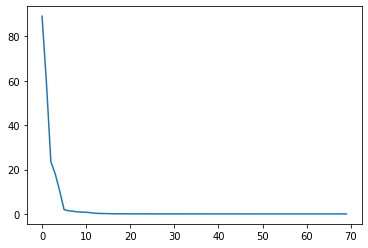

In [83]:
eigenvalues = my_pca.explained_variance_
plt.figure()
plt.plot(eigenvalues, label='Evolution eigenvalues')
plt.show()

Text(0, 0.5, 'Percentage of the variance')

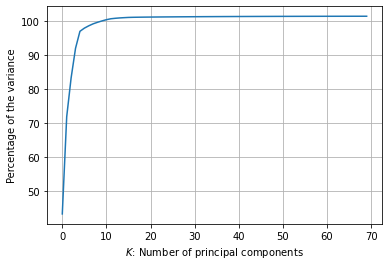

In [84]:
data_variance = np.sum(np.var(X_train,0))

# 2.- plot the cummulative sum of the sorted eigenvalues divided by the total variance of the data
# 2.1.- express the y-axis in percentage
plt.figure()
plt.plot(100*np.cumsum(eigenvalues)/data_variance, label='Evolution eigenvalues')
plt.grid()
plt.xlabel('$K$: Number of principal components')
plt.ylabel('Percentage of the variance')

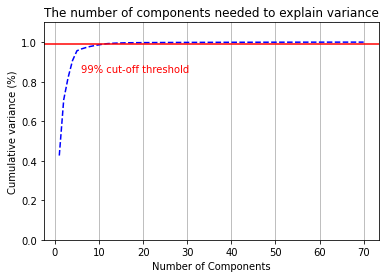

In [85]:
fig, ax = plt.subplots()
xi = np.arange(1, 71, step=1)
y = np.cumsum(my_pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 71, step=10)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.99, color='r', linestyle='-')
plt.text(6, 0.85, '99% cut-off threshold', color = 'red', fontsize=10)

ax.grid(axis='x')
plt.show()

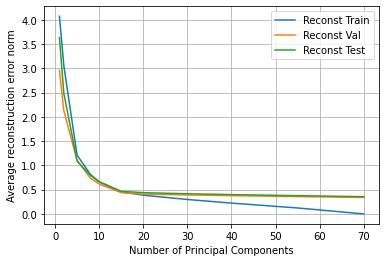

In [86]:
n_reconst_list=[1,2, 5, 8, 10, 15, 20, 30, 40, 55, 70]
error_train = np.empty(len(n_reconst_list))
error_val = np.empty(len(n_reconst_list))
error_test = np.empty(len(n_reconst_list))

for ii,n_comp in enumerate(n_reconst_list):
    Reconstruct_train = P_train[:,0:n_comp+1].dot(my_pca.components_[0:n_comp+1,:])
    error_train[ii] = np.mean(np.linalg.norm(X_train-Reconstruct_train,axis=0))
    Reconstruct_val = P_val[:,0:n_comp+1].dot(my_pca.components_[0:n_comp+1,:])
    error_val[ii] = np.mean(np.linalg.norm(X_val-Reconstruct_val,axis=0))
    Reconstruct_test = P_test[:,0:n_comp+1].dot(my_pca.components_[0:n_comp+1,:])
    error_test[ii] = np.mean(np.linalg.norm(X_test-Reconstruct_test,axis=0))
    
plt.figure()
plt.plot(n_reconst_list, error_train, label='Reconst Train')
plt.plot(n_reconst_list, error_val, label='Reconst Val')
plt.plot(n_reconst_list, error_test, label='Reconst Test')
plt.xlabel('Number of Principal Components')
plt.ylabel('Average reconstruction error norm')
plt.legend()
plt.grid()

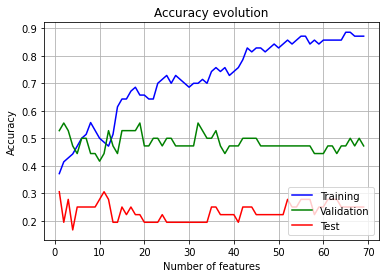

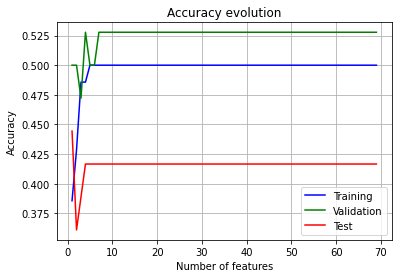

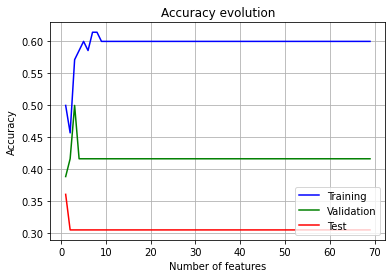

In [87]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

def SVM_accuracy_evolution(X_train_t, Y_train, X_val_t, Y_val, X_test_t, Y_test,kernel, rang_feat):
    """Compute the accuracy of training, validation and test data for different the number of features

    Args:
        X_train_t (numpy dnarray): training data projected in the new feature space (number data x number dimensions).
        Y_train (numpy dnarray): labels of the training data (number data x 1).
        X_val_t (numpy dnarray): validation data projected in the new feature space (number data x number dimensions).
        Y_val (numpy dnarray): labels of the validation data (number data x 1).
        X_test_t (numpy dnarray): test data projected in the new feature space (number data x number dimensions).
        Y_test (numpy dnarray): labels of the test data (number data x 1).                                     
        rang_feat: range with different number of features to be evaluated 
    """
    
    # Define the model to train a liner SVM
    clf = svm.SVC(kernel=kernel)
    
    acc_tr = np.empty(X_train_t.shape[1]-1)
    acc_val = np.empty(X_train_t.shape[1]-1)
    acc_test = np.empty(X_train_t.shape[1]-1)
    for i in rang_feat:
        # Train SVM classifier
        clf.fit(X_train_t[:,:i], Y_train)

        # Compute train, val and test accuracies and save in acc_tr, acc_val and acc_test
        acc_tr[i-1] =  clf.score(X_train_t[:,:i], Y_train)
        acc_val[i-1] = clf.score(X_val_t[:,:i], Y_val)
        acc_test[i-1] = clf.score(X_test_t[:,:i], Y_test)

    return acc_tr, acc_val,acc_test

# Run the function with the pca extracted features  and plot the result
rang_feat = range(1,P_train.shape[1])
kernel = ['linear', 'poly', 'rbf']
for k in kernel:
  [acc_tr, acc_val, acc_test] = SVM_accuracy_evolution(P_train, 
                                                      Y_train, 
                                                      P_val, 
                                                      Y_val, 
                                                      P_test,
                                                      Y_test, 
                                                      k, 
                                                      rang_feat)

  plt.figure()
  plt.plot(range(1,P_train.shape[1]),acc_tr, "b", label="train")
  plt.plot(range(1,P_train.shape[1]),acc_val, "g", label="validation")
  plt.plot(range(1,P_train.shape[1]),acc_test, "r", label="test")
  plt.xlabel("Number of features")
  plt.ylabel("Accuracy")
  plt.title('Accuracy evolution')
  plt.legend(['Training', 'Validation', 'Test'], loc = 4)
  plt.grid()
  plt.show()


In [88]:
pcaData = pd.DataFrame(my_pca.components_)

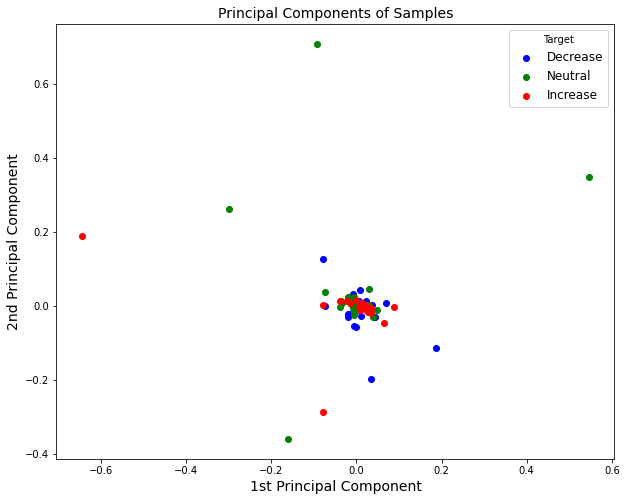

In [89]:
# Scatterplot against PC1 and PC2
fig, ax = plt.subplots(1,1, figsize=(10,8))

# Row masks for each category
zero = Y_train==0;
one = Y_train==1; 
two = Y_train==2; 

ax.scatter(pcaData.loc[zero.tolist(), 0], pcaData.loc[zero.tolist(), 1], c='b', label='Decrease')
ax.scatter(pcaData.loc[one.tolist(), 1], pcaData.loc[one.tolist(), 2], c='g', label='Neutral')
ax.scatter(pcaData.loc[two.tolist(), 1], pcaData.loc[two.tolist(), 2], c='r', label='Increase')

ax.set_title("Principal Components of Samples", fontsize=14)
ax.set_xlabel("1st Principal Component", fontsize=14)
ax.set_ylabel("2nd Principal Component", fontsize=14)
ax.legend(title='Target', fontsize=12)
plt.show()

In [90]:
PC_train = pd.DataFrame(P_train[:,:15],columns=list('ABCDEFGHIJKLMNO'))
PC_val = pd.DataFrame(P_val[:,:15],columns=list('ABCDEFGHIJKLMNO'))
PC_test = pd.DataFrame(P_test[:,:15],columns=list('ABCDEFGHIJKLMNO'))
PC_train.shape

(70, 15)

## LDA

In [91]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

def SVM_accuracy_evolution(X_train_t, Y_train, X_val_t, Y_val, X_test_t, Y_test, rang_feat):
    """Compute the accuracy of training, validation and test data for different the number of features

    Args:
        X_train_t (numpy dnarray): training data projected in the new feature space (number data x number dimensions).
        Y_train (numpy dnarray): labels of the training data (number data x 1).
        X_val_t (numpy dnarray): validation data projected in the new feature space (number data x number dimensions).
        Y_val (numpy dnarray): labels of the validation data (number data x 1).
        X_test_t (numpy dnarray): test data projected in the new feature space (number data x number dimensions).
        Y_test (numpy dnarray): labels of the test data (number data x 1).                                     
        rang_feat: range with different number of features to be evaluated 
    """
    
    # Define the model to train a liner SVM
    clf = svm.SVC(kernel='linear')
    
    acc_tr = np.empty(X_train_t.shape[1]-1)
    acc_val = np.empty(X_train_t.shape[1]-1)
    acc_test = np.empty(X_train_t.shape[1]-1)
    for i in rang_feat:
        # Train SVM classifier
        clf.fit(X_train_t[:,:i], Y_train)

        # Compute train, val and test accuracies and save in acc_tr, acc_val and acc_test
        acc_tr[i-1] =  clf.score(X_train_t[:,:i], Y_train)
        acc_val[i-1] = clf.score(X_val_t[:,:i], Y_val)
        acc_test[i-1] = clf.score(X_test_t[:,:i], Y_test)

    return acc_tr, acc_val,acc_test

In [92]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

N_feat_max = 2 # As many new features as classes minus 1
# 1. Obtain LDA or CCA projections
lda = LinearDiscriminantAnalysis(n_components=N_feat_max)
lda.fit(PC_train, Y_train)
P_train_lda = lda.transform(PC_train)
P_val_lda = lda.transform(PC_val)
P_test_lda = lda.transform(PC_test)

# 2. Compute and plot accuracy evolution
rang_feat = np.arange(1, N_feat_max, 1)
[acc_tr, acc_val, acc_test] = SVM_accuracy_evolution(P_train_lda, Y_train, P_val_lda, Y_val, P_test_lda, Y_test, rang_feat)

pos_max = np.argmax(acc_val)
num_opt_feat = rang_feat[pos_max]
test_acc_opt = acc_test[pos_max]

print('Number optimum of features: %d' %(num_opt_feat))
print("The optimum test accuracy is  %2.2f%%" %(100*test_acc_opt))

Number optimum of features: 1
The optimum test accuracy is  27.78%


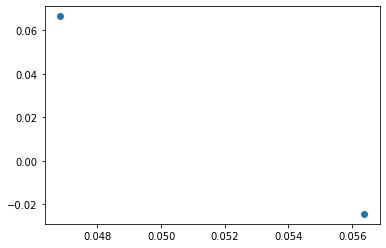

In [93]:
plt.scatter(lda.scalings_[0], lda.scalings_[1])

We choose 15 variables because even if it has some overfitting we can see that it has the best reconstruction

## Classification: RF Classification

In [94]:
from sklearn.ensemble import RandomForestClassifier

estimators= [100,125,150]
depth = [3,4,5]
samples_split = [1,3,5]
leaf_nodes = [None,1,2]
param_grid = {'n_estimators':estimators,
              'max_depth':depth,
              'min_samples_split':samples_split,
              'max_leaf_nodes':leaf_nodes
              }
RF = RandomForestClassifier()

grid = GridSearchCV(RF, param_grid, cv=5, scoring='accuracy')
grid.fit(P_train_lda,Y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
225 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/p

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 4, 5], 'max_leaf_nodes': [None, 1, 2],
                         'min_samples_split': [1, 3, 5],
                         'n_estimators': [100, 125, 150]},
             scoring='accuracy')

In [95]:
best_params = grid.best_params_
print(best_params)
print(grid.best_score_)

{'max_depth': 3, 'max_leaf_nodes': 2, 'min_samples_split': 3, 'n_estimators': 100}
0.5857142857142857


In [96]:
# Compute train, val and test accuracies and save in acc_tr, acc_val and acc_test
print(grid.score(P_val_lda, Y_val))
print(grid.score(P_test_lda, Y_test))

0.4722222222222222
0.16666666666666666


# DATA WITHOUT AVERAGE

In [97]:
X.reset_index(inplace=True)
X['date'] = X['date'].astype(str)
X = X.set_index('date')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """Entry point for launching an IPython kernel.


In [98]:
X.set_index
price = price.loc[X.index.values,:]

In [99]:
Y = price['target']

In [100]:
print(X.shape)
print(Y.shape)

(7005, 206)
(7005,)


## TRAIN-VAL-TEST SPLIT

We split the dataset first into train & test, train 75% and test 25%. Then we split the train set again into train 66.6% and validation 33.33%.

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize

# split into a training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

# split into a training and validation set
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.333)

# Normalizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

# Binarize the labels for supervised feature extraction methods
set_classes = np.unique(Y)
Y_train_bin = label_binarize(Y_train, classes=set_classes)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


## PCA

In [102]:
from sklearn.decomposition import PCA

N_feat_max=206


my_pca = PCA(n_components=N_feat_max).fit(X_train)
P_train = my_pca.transform(X_train)
P_val = my_pca.transform(X_val)
P_test = my_pca.transform(X_test)

dim_train = P_train.shape[1]
dim_val = P_val.shape[1]
dim_test = P_test.shape[1]


print('Dimensions of training data are: ' + str(dim_train))
print('Dimensions of validation data are: ' + str(dim_val))
print('Dimensions of test data are: ' + str(dim_test))

Dimensions of training data are: 206
Dimensions of validation data are: 206
Dimensions of test data are: 206


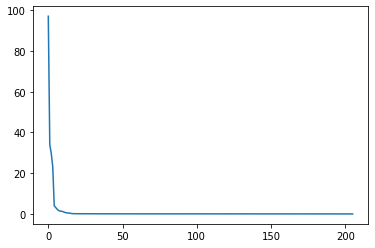

In [103]:
eigenvalues = my_pca.explained_variance_
plt.figure()
plt.plot(eigenvalues, label='Evolution eigenvalues')
plt.show()

Text(0, 0.5, 'Percentage of the variance')

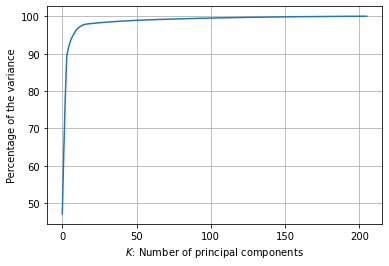

In [104]:
data_variance = np.sum(np.var(X_train,0))

# 2.- plot the cummulative sum of the sorted eigenvalues divided by the total variance of the data
# 2.1.- express the y-axis in percentage
plt.figure()
plt.plot(100*np.cumsum(eigenvalues)/data_variance, label='Evolution eigenvalues')
plt.grid()
plt.xlabel('$K$: Number of principal components')
plt.ylabel('Percentage of the variance')

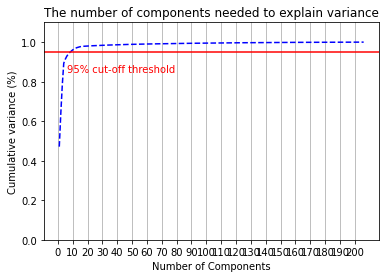

In [105]:
fig, ax = plt.subplots()
xi = np.arange(1, 207, step=1)
y = np.cumsum(my_pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 206, step=10)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(6, 0.85, '95% cut-off threshold', color = 'red', fontsize=10)

ax.grid(axis='x')
plt.show()

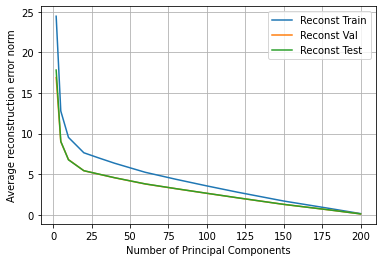

In [106]:
n_reconst_list=[2, 5, 10, 20, 30, 40, 60, 80, 100, 120, 150,180, 200]
error_train = np.empty(len(n_reconst_list))
error_val = np.empty(len(n_reconst_list))
error_test = np.empty(len(n_reconst_list))

for ii,n_comp in enumerate(n_reconst_list):
    Reconstruct_train = P_train[:,0:n_comp+1].dot(my_pca.components_[0:n_comp+1,:])
    error_train[ii] = np.mean(np.linalg.norm(X_train-Reconstruct_train,axis=0))
    Reconstruct_val = P_val[:,0:n_comp+1].dot(my_pca.components_[0:n_comp+1,:])
    error_val[ii] = np.mean(np.linalg.norm(X_val-Reconstruct_val,axis=0))
    Reconstruct_test = P_test[:,0:n_comp+1].dot(my_pca.components_[0:n_comp+1,:])
    error_test[ii] = np.mean(np.linalg.norm(X_test-Reconstruct_test,axis=0))
    
plt.figure()
plt.plot(n_reconst_list, error_train, label='Reconst Train')
plt.plot(n_reconst_list, error_val, label='Reconst Val')
plt.plot(n_reconst_list, error_test, label='Reconst Test')
plt.xlabel('Number of Principal Components')
plt.ylabel('Average reconstruction error norm')
plt.legend()
plt.grid()

In [107]:
df_pca = pd.DataFrame(my_pca.components_)

## Feature selection: Random Forest Regressor

In [108]:
PC2_train = P_train[:,:10]
PC2_val = P_val[:,:10]
PC2_test = P_test[:,:10]

In [109]:
import random
import string

letters_and_digits = string.ascii_letters + string.digits
col = [random.choice(letters_and_digits) for i in range(10)]

PC2_train = pd.DataFrame(PC2_train, columns=col)
PC2_val = pd.DataFrame(PC2_val, columns=col)
PC2_test = pd.DataFrame(PC2_test, columns=col)

In [110]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(1)
# Build a forest and obtain the feature importances
forest = RandomForestRegressor(n_estimators=200)
forest.fit(PC2_train, Y_train)
importances = forest.feature_importances_

# Obtain the positions of the sorted features (the most relevant first)
ind_rel_feat = np.argsort(importances)[::-1]

# Print the feature ranking
ranking_RF = pd.Series(importances[ind_rel_feat], index =PC2_train.columns[ind_rel_feat]) 
ranking_RF


n    0.108965
4    0.105265
J    0.103657
U    0.100764
d    0.100553
I    0.097135
a    0.097046
D    0.095984
9    0.095828
R    0.094802
dtype: float64

Text(0.5, 1.0, 'Feature importance with RF')

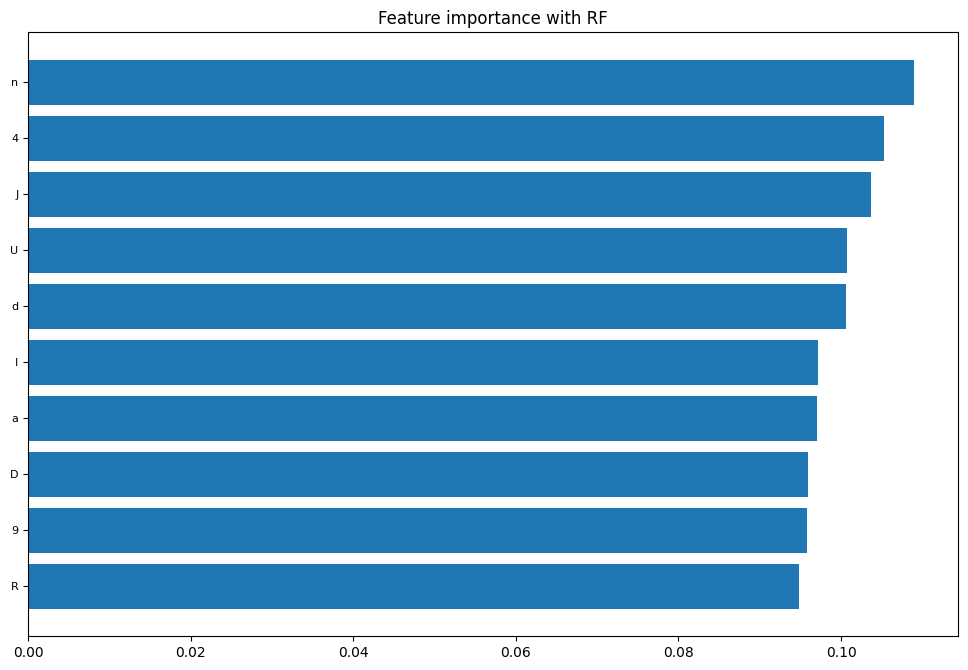

In [111]:
plt.figure(dpi=100, figsize=(12, 8))
plt.rc('ytick', labelsize=8) 
y = ranking_RF.sort_values(ascending=True)
width = np.arange(len(y))
ticks = list(y.index)
plt.barh(width, y)
plt.yticks(width, ticks)
plt.title('Feature importance with RF')

In [112]:
c1

NameError: ignored

In [ ]:
for col in PC2_train:
  if col in c1:
    print(col)

In [ ]:
best = ranking_RF[ranking_RF.values>0.1]
c = best.index.values
print(c)
c1 = [i for i in c]
df_RF_train = pd.DataFrame()
df_RF_val = pd.DataFrame()
df_RF_test = pd.DataFrame()


for col in PC2_train:
  if col in c:
    df_RF_train[col] = PC2_train[col]
for col in PC2_val:
  if col in c:
    df_RF_val[col] = PC2_val[col]
for col in PC2_test:
  if col in c:
    df_RF_test[col] = PC2_test[col]


df_RF_train.head()

## Classification: RF Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier

estimators= [100,125,150]
depth = [3,4,5]
samples_split = [1,3,5]
leaf_nodes = [None,1,2]
param_grid = {'n_estimators':estimators,
              'max_depth':depth,
              'min_samples_split':samples_split,
              'max_leaf_nodes':leaf_nodes
              }
RF = RandomForestClassifier()

grid = GridSearchCV(RF, param_grid, cv=5, scoring='accuracy')
grid.fit(df_RF_train,Y_train)


In [ ]:
best_params = grid.best_params_
print(best_params)
print(grid.best_score_)

In [ ]:
# Compute train, val and test accuracies and save in acc_tr, acc_val and acc_test
print(grid.score(df_RF_val, Y_val))
print(grid.score(df_RF_test, Y_test))